# Part 1: Data Importing (15 points)
- Load the Iris dataset from Seaborn and save it as a CSV file (2 points)
- Load the Titanic dataset from a CSV (either from local file or URL) (2 points)
- Import a text file (tab-delimited) containing data and convert it to a  
  DataFrame (5 points)
- Load your chosen CSV dataset from Part 1 (3 points)
- For each dataset, display the first 5 rows and basic info (shape, columns, -
  data types) (3 points)

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns

# 1. Load Iris dataset from Seaborn and save it as CSV
iris = sns.load_dataset("iris")
iris.to_csv("iris.csv", index=False)
# index=False means don't save row numbers in the file.
# .to_csv saves the data in CSV format (comma-separated values).

# 2. Load Titanic dataset from local CSV or URL
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# 3. Load a tab-delimited text file (create or download one)
text_df = pd.read_csv(r"technologie_1.txt", sep="\t")
# Loading a text file where columns are separated by a TAB (not commas).
# sep="\t" tells pandas to use TAB as the separator.

# 4. Load any additional CSV dataset (e.g., Netflix, COVID, etc.)
custom_df = pd.read_csv(r"iris.csv")

# 5. Display first 5 rows and basic info
datasets = {'Iris': iris, 'Titanic': titanic, 'Text': text_df, 'Custom': custom_df}
for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print(df.head())

# 5. Display first 5 rows and basic info
datasets = {'Iris': iris, 'Titanic': titanic, 'Text': text_df, 'Custom': custom_df}
for name, df in datasets.items():
    print(f"\n{name} Dataset:")
    print("\n \t  Output of Head Section")
    print(df.head())
    print("\n \t  Output of Shape Section")
    print(df.shape)
    print("\n \t Output of dtypes Section")
    print(df.dtypes)

#print(df.head()) – Shows the first 5 rows.

# print(df.shape) – Shows the size of the data (rows, columns).

# print(df.dtypes) – Shows the type of data in each column (e.g., numbers, text, etc.).


Iris Dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Titanic Dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  fema

# Part 2: Data Cleaning (30 points)
- For each dataset (Iris, Titanic, your CSV, and text file):
- Check for missing values and handle them appropriately (impute or
 remove) (8 points)
- Identify and handle any duplicate rows (4 points)
- Convert data types if necessary (e.g., strings to numbers, dates to
  datetime) (6 points)
- For categorical variables, either encode them or ensure consistent -
  formatting (6 points)
- Identify and handle any outliers in numerical columns (6 points)

In [2]:
def clean_dataset(df):
    print("Missing values before:")
    print(df.isnull().sum())

    # Handling missing values
    df = df.dropna()
    # instead of dropping all the rows with missing value
    # we can use the concept of mean ,median and mode

    # Remove duplicates
    df = df.drop_duplicates()

    # Convert data types (example)
    # df['column'] = pd.to_numeric(df['column'], errors='coerce')


    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                print(f"Converted {col} to numeric.")
            except:
                # If fails, assume it's truly categorical
                pass

    # Convert to datetime if the column name suggests it's a date
    for col in df.columns:
        if 'date' in col.lower() or 'time' in col.lower():
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
            except:
                pass

    # For categorical variables, ensure consistent formatting
    cat_cols = df.select_dtypes(include='object').columns
    df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.lower())




    # Encode categorical variables
    cat_cols = df.select_dtypes(include='object').columns
    df[cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.lower())

    # Handle outliers using IQR
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

    return df

# Apply cleaning to all datasets
iris_clean = clean_dataset(iris)
titanic_clean = clean_dataset(titanic)
text_clean = clean_dataset(text_df)
custom_clean = clean_dataset(custom_df)

Missing values before:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values before:
The Arizona Attorney General (AG) Mark Brnovich has filed a consumer fraud lawsuit against Google, alleging that the company used “deceptive” practices to track the location of users even after they turned off location tracking.    0
dtype: int64
Missing values before:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [3]:
def clean_dataset(df):
    # Work on a copy to avoid modifying the original dataframe
    df = df.copy()

    # Check and display missing values before cleaning
    print("Missing values before:")
    print(df.isnull().sum())

    # Handling missing values more carefully:
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'unknown')
        elif np.issubdtype(df[col].dtype, np.number):
            df[col] = df[col].fillna(df[col].median())
        elif np.issubdtype(df[col].dtype, np.datetime64):
            df[col] = df[col].fillna(df[col].median())

    # Identify and handle duplicate rows
    df = df.drop_duplicates().copy()

    # Convert data types where necessary:
    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col])
                print(f"Converted {col} to numeric.")
            except:
                pass

    for col in df.columns:
        if 'date' in col.lower() or 'time' in col.lower():
            try:
                df[col] = pd.to_datetime(df[col], errors='coerce')
            except:
                pass

    # For categorical variables, ensure consistent formatting
    cat_cols = df.select_dtypes(include='object').columns
    df.loc[:, cat_cols] = df[cat_cols].apply(lambda x: x.str.strip().str.lower())

    # Handle outliers using IQR method
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter and create a fresh copy to avoid warning
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy()

    # Final check
    print("Missing values after:")
    print(df.isnull().sum())

    return df

# Apply the cleaning function safely to all datasets:
iris_clean = clean_dataset(iris)
titanic_clean = clean_dataset(titanic)
text_clean = clean_dataset(text_df)
custom_clean = clean_dataset(custom_df)


Missing values before:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Missing values after:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values after:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Missing values before:
The Arizona Attorney General (AG) Mark Brnovich has filed a consumer fraud lawsuit against Google, alleging that the company used “deceptive” practices to track the location of users even after they turned off location trac

# Part 3: Data Merging and Transformation (25 points)
- Take the Titanic dataset and split it into two DataFrames (passenger
  info and ticket info) then merge them back (5 points)
- Create a new DataFrame that combines information from your chosen CSV
  and the text file dataset (10 points)
- Perform appropriate joins (inner, outer, left, or right) with
  justification
- Handle any merging issues (column name conflicts, etc.)
- Create at least 3 new derived columns across your datasets (e.g., age
  groups, binned numerical values, etc.) (10 points)

In [4]:
# Titanic Dataset: Split into two parts and merge back
passenger_info = titanic_clean[['Name', 'Sex', 'Age', 'Survived']]
ticket_info = titanic_clean[['Name', 'Ticket', 'Fare']]

# Merge using 'Name' as the key
merged_titanic = pd.merge(passenger_info, ticket_info, on='Name')
print("Merged Titanic DataFrame:")
print(merged_titanic.head())

# Check columns in text and custom dataset
print("Text Clean Columns:", text_clean.columns.tolist())
print("Custom Clean Columns:", custom_clean.columns.tolist())

# If no common column, merge by index
text_clean = text_clean.reset_index(drop=True)
custom_clean = custom_clean.reset_index(drop=True)

# Merge by index
combined_df = pd.concat([text_clean, custom_clean], axis=1)
print("Combined DataFrame from text and custom dataset:")
print(combined_df.head())

# Create 3 derived columns in Titanic dataset
titanic_clean['AgeGroup'] = pd.cut(
    titanic_clean['Age'],
    bins=[0, 12, 20, 60, 100],
    labels=['Child', 'Teen', 'Adult', 'Senior']
)

# Bin Fare into quartiles
titanic_clean['FareBin'] = pd.qcut(titanic_clean['Fare'], 4, labels=False)

# New column: whether person is a minor
titanic_clean['IsMinor'] = titanic_clean['Age'] < 18

# Show derived columns
print("Titanic with new derived columns:")
print(titanic_clean[['Age', 'AgeGroup', 'Fare', 'FareBin', 'IsMinor']].head())


Merged Titanic DataFrame:
                                           Name     Sex   Age  Survived  \
0                       braund, mr. owen harris    male  22.0         0   
1                        heikkinen, miss. laina  female  26.0         1   
2  futrelle, mrs. jacques heath (lily may peel)  female  35.0         1   
3                      allen, mr. william henry    male  35.0         0   
4                              moran, mr. james    male  28.0         0   

             Ticket     Fare  
0         a/5 21171   7.2500  
1  ston/o2. 3101282   7.9250  
2            113803  53.1000  
3            373450   8.0500  
4            330877   8.4583  
Text Clean Columns: ['The Arizona Attorney General (AG) Mark Brnovich has filed a consumer fraud lawsuit against Google, alleging that the company used “deceptive” practices to track the location of users even after they turned off location tracking.']
Custom Clean Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',

#Part 4:
Data Analysis and Exploration  (20 points)
-For each cleaned dataset:
- Calculate basic statistics (mean,  
  median, mode, standard deviation) (5 points)
- Perform at least 3 interesting groupby
  operations (5 points)
- Create at least  meaningful     cross-tabulations (5 points)
- Calculate correlations between numerical
  variables (5 points)
- Create your outlier logic and remove the outliers from the data.

In [5]:
for name, df in {'Iris': iris_clean, 'Titanic': titanic_clean}.items():
    print(f"\n{name} Stats:")
    print(df.describe())
    print("Mode:\n", df.mode())

    # Groupby examples
    print(df.groupby('Sex')['Survived'].mean() if 'Sex' in df.columns else df.groupby('species').mean())
    print(df.groupby('Pclass')['Survived'].mean() if 'Pclass' in df.columns else df.groupby('species').mean())
    print(df.groupby('Age')['Survived'].mean() if 'Age' in df.columns else df.groupby('species').mean())

    # Cross-tabulations
    if 'Sex' in df.columns and 'Pclass' in df.columns:
        print(pd.crosstab(df['Sex'], df['Pclass']))
    if 'species' in df.columns and 'sepal_width' in df.columns:
        print(pd.crosstab(df['species'], df['sepal_width']))

    # Correlations
    print(df.corr(numeric_only=True))

    # Outlier Removal Example (using IQR)
    # Filter the numeric columns only
    numeric_df = df.select_dtypes(include=[float, int])

    # Calculate Q1, Q3, and IQR only on numeric columns
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Remove outliers
    df_outliers_removed = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    print("Data after removing outliers:\n", df_outliers_removed.describe())



Iris Stats:
       sepal_length  sepal_width  petal_length  petal_width
count    145.000000   145.000000    145.000000   145.000000
mean       5.857241     3.042759      3.797931     1.215862
std        0.836971     0.398216      1.760819     0.759905
min        4.300000     2.200000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.000000      6.900000     2.500000
Mode:
    sepal_length  sepal_width  petal_length  petal_width     species
0           5.0          3.0           1.4          0.2  versicolor
1           5.1          NaN           NaN          NaN   virginica
2           6.3          NaN           NaN          NaN         NaN
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa          4.976596     3.376596 

# Part 5:
 Exporting Results (10 points)
- Save all your cleaned datasets to new  
 CSV files (3 points)
- Save one of your datasets to JSON format
 (2 points)
- Create a Markdown file summarizing your
 data cleaning steps and findings (5 points)

In [6]:
# Save cleaned datasets
iris_clean.to_csv("iris_clean.csv", index=False)
titanic_clean.to_csv("titanic_clean.csv", index=False)
text_clean.to_csv("text_clean.csv", index=False)
custom_clean.to_csv("custom_clean.csv", index=False)

# Save one as JSON
titanic_clean.to_json("titanic_clean.json", orient='records', lines=True)

# Markdown summary (in README.md)
with open("README.md", "w") as file:
    file.write("# Data Wrangling Assignment\n\n")
    file.write("## Data Cleaning Summary\n")
    file.write("- Missing values handled with dropna.\n")
    file.write("- Duplicates removed.\n")
    file.write("- Data types converted.\n")
    file.write("- Categorical variables standardized.\n")
    file.write("- Outliers removed using IQR.\n")


# Bonus Points (10 points):
- Implement a custom function that
 automates part of your cleaning process
- Create visualizations that show before/
 after your data cleaning
- Handle a particularly challenging data
  quality issue with explanation

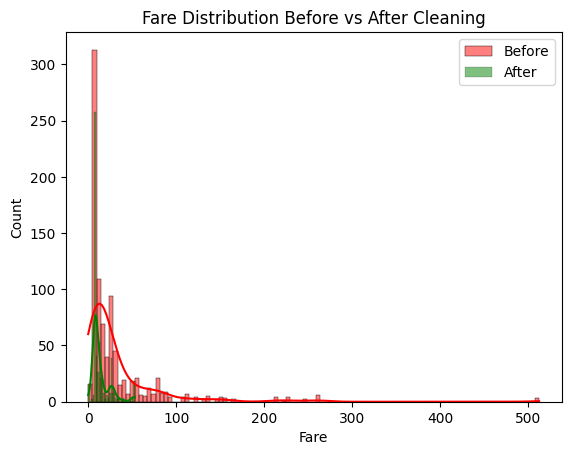

In [7]:
# Before/After cleaning comparison (for Titanic Fare)
import matplotlib.pyplot as plt
sns.histplot(titanic['Fare'], kde=True, color='red', label='Before')
sns.histplot(titanic_clean['Fare'], kde=True, color='green', label='After')
plt.legend()
plt.title('Fare Distribution Before vs After Cleaning')
plt.show()


